In [17]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [18]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [19]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [20]:
len(df)

855454

In [21]:
df = df.explode('008')

In [22]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [23]:
len(df)

855454

In [24]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [25]:
len(df)

679329

In [26]:
df['titul'] = df['245_a'].apply(lambda x: x[0][:-1].strip() if x[0][-1] in [':','/',';','='] else x[0].strip())
df['autorstvo'] = df['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
df['autorstvo_kod'] = df['100_7'].apply(lambda x: x[0] if x != None else None)
df = df.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [27]:
len(df)

542332

In [132]:
from src.pocet_stran import pocet_stran

In [115]:
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [116]:
df[['300_a','stran']].sample(30)

,300_a,stran
001,,
nkc20183001769,[451 stran ;],451.0
np9430579,[58 s. ;],58.0
ck8503072,[80 s. :],80.0
nkc20122405237,[32 s. :],32.0
nkc20061700537,[87 s. :],87.0
nkc20223441075,[24 stran ;],24.0
nkc20142635926,[134 s. :],134.0
bknaus03349,[388 s. ;],388.0
cpk20011008550,[31 s. :],31.0


In [117]:
za_rok = 365 * 12 * 60
za_rok

262800

In [118]:
df.groupby('rok')['stran'].sum().tail()

rok
2021.0    1794180.0
2022.0    1775445.0
2023.0    1640368.0
2024.0     843498.0
2025.0         89.0
Name: stran, dtype: float64

<Axes: xlabel='rok'>

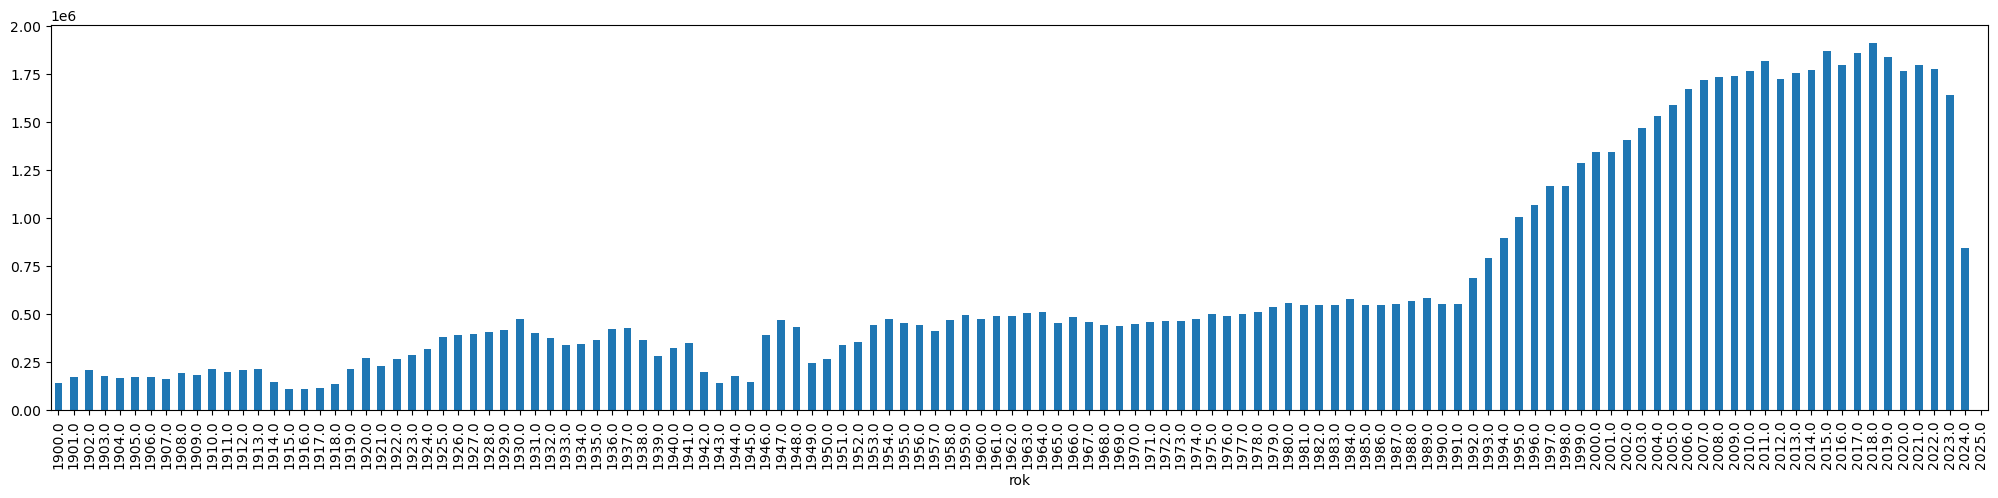

In [119]:
df.groupby('rok')['stran'].sum().plot.bar(figsize=(25,5))

In [120]:
df[df['stran'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    0.996482
1901.0    0.994338
1902.0    0.998748
1903.0    0.996656
1904.0    0.996589
1905.0    0.996444
1906.0    0.996234
1907.0    0.994091
1908.0    0.993151
1909.0    0.996426
1910.0    0.996281
1911.0    0.995607
1912.0    0.996158
1913.0    0.994271
1914.0    0.997874
1915.0    0.995992
1916.0    0.994500
1917.0    0.997314
1918.0    0.993392
1919.0    0.993372
1920.0    0.996411
1921.0    0.995665
1922.0    0.996634
1923.0    0.993068
1924.0    0.992557
1925.0    0.994667
1926.0    0.993835
1927.0    0.990719
1928.0    0.981608
1929.0    0.972973
1930.0    0.969886
1931.0    0.970208
1932.0    0.965997
1933.0    0.969072
1934.0    0.955896
1935.0    0.959122
1936.0    0.954569
1937.0    0.945003
1938.0    0.952096
1939.0    0.951285
1940.0    0.956868
1941.0    0.948710
1942.0    0.955379
1943.0    0.982315
1944.0    0.991503
1945.0    0.979629
1946.0    0.991794
1947.0    0.995398
1948.0    0.996103
1949.0    0.999003
1950.0    1.000000
1951.0    0.999226
1952.0  

Vyplněnost solidní!

In [122]:
df[['300_a','stran','245_a','rok']].sort_values(by="stran",ascending=False).head(20)

,300_a,stran,245_a,rok
001,,,,
cpk20010997083,[3665 s. ;],3665.0,[Sedmero tajemství /],2001.0
nkc20183048417,[3 svazky (3496 stran) ;],3496.0,[Španělsko-český slovník amerikanismů =],2018.0
nkc20091995200,"[2 sv. (xx, 1579, xvii, s.1581-3343) ;]",3343.0,[Občanský soudní řád :],2009.0
nkc20203263529,"[2 svazky (xxx, 1-1642; ix, 1643-3331 stran) ;]",3331.0,[Trestní zákoník :],2020.0
nkc20172900819,"[lxii, 3053 stran ;]",3053.0,[Občanský zákoník :],2017.0
nos190227417,[2855 s. ;],2855.0,"[Buffalo Bill, národní hrdina americký /]",1908.0
nkc20132505680,[2 sv. (2775 s.) :],2775.0,[Vývoj konstitucionalismu v českých zemích /],2013.0
nkc20132502112,[3 sv. (2733 s.) ;],2733.0,[Komentář k zákonu o obchodních korporacích /],2013.0
nos190240810,[2710 s. ;],2710.0,[Pražský kat :],1910.0


In [123]:
df.groupby('rok')['stran'].sum() / za_rok

rok
1900.0    0.534475
1901.0    0.658539
1902.0    0.797359
1903.0    0.675156
1904.0    0.638063
1905.0    0.649125
1906.0    0.654113
1907.0    0.606826
1908.0    0.725202
1909.0    0.700167
1910.0    0.813185
1911.0    0.761621
1912.0    0.792382
1913.0    0.820997
1914.0    0.556290
1915.0    0.406126
1916.0    0.416750
1917.0    0.428075
1918.0    0.518809
1919.0    0.803234
1920.0    1.022393
1921.0    0.870133
1922.0    1.019966
1923.0    1.084871
1924.0    1.208345
1925.0    1.455925
1926.0    1.481526
1927.0    1.503219
1928.0    1.540818
1929.0    1.575091
1930.0    1.805498
1931.0    1.532881
1932.0    1.418459
1933.0    1.281777
1934.0    1.304699
1935.0    1.382861
1936.0    1.606050
1937.0    1.615141
1938.0    1.387926
1939.0    1.070651
1940.0    1.218215
1941.0    1.318200
1942.0    0.743615
1943.0    0.543748
1944.0    0.672116
1945.0    0.561282
1946.0    1.495023
1947.0    1.775179
1948.0    1.644821
1949.0    0.923615
1950.0    1.013999
1951.0    1.289593
1952.0  